In [1]:
import numpy as np
import matplotlib.pyplot as plt

from toygrad import MLP, Layer, Sigmoid, SoftMax, ReLU, TanH, Linear, LeakyReLU, SquaredError, BinaryCrossEntropy, CategoricalCrossEntropy, AbsoluteError
from plot import plot_train_test_losses, plot_categorical_decisions, plot_regression_decisions, plot_network

np.random.seed(2137)
plt.rcParams["figure.figsize"] = (15,10)

CLF = "data/classification"
REG = "data/regression"
DATASET_SIZES = [10000]#, 500, 1000, 10_000]

def one_hot(y):
    y = y.astype(int) - 1
    if (y.max() == 1):
        # This means this is a binary class - we can use a single variable
        return np.reshape(y, (-1, 1))
    encoded = np.zeros((y.size, y.max()+1))
    encoded[np.arange(y.size),y] = 1
    return encoded

def read_data(path, categorical=False, normalize_inputs=False):
    def normalize(vector):
        return (vector - vector.min()) / (np.ptp(vector))
    assert not (categorical and normalize_inputs), "Cannot normalize categorical data"
    """Read and shuffle the dataset"""
    data = np.genfromtxt(path, delimiter=',')[1:]
    np.random.shuffle(data)
    X = data[:, :-1]
    Y = one_hot(data[:, -1]) if categorical else data[:, -1].reshape(-1, 1)
    if normalize_inputs:
        X, Y = normalize(X), normalize(Y)    
    return X, Y

# Classification

### Simple dataset

Simple dataset (train/test sample size 10000)
Epoch   10 - train loss 0.032 (std:0.03) - test loss 0.031 (std:0.11)
Epoch   20 - train loss 0.020 (std:0.03) - test loss 0.020 (std:0.09)
Epoch   30 - train loss 0.016 (std:0.02) - test loss 0.016 (std:0.09)
Epoch   40 - train loss 0.014 (std:0.02) - test loss 0.014 (std:0.08)
Epoch   50 - train loss 0.013 (std:0.02) - test loss 0.013 (std:0.08)


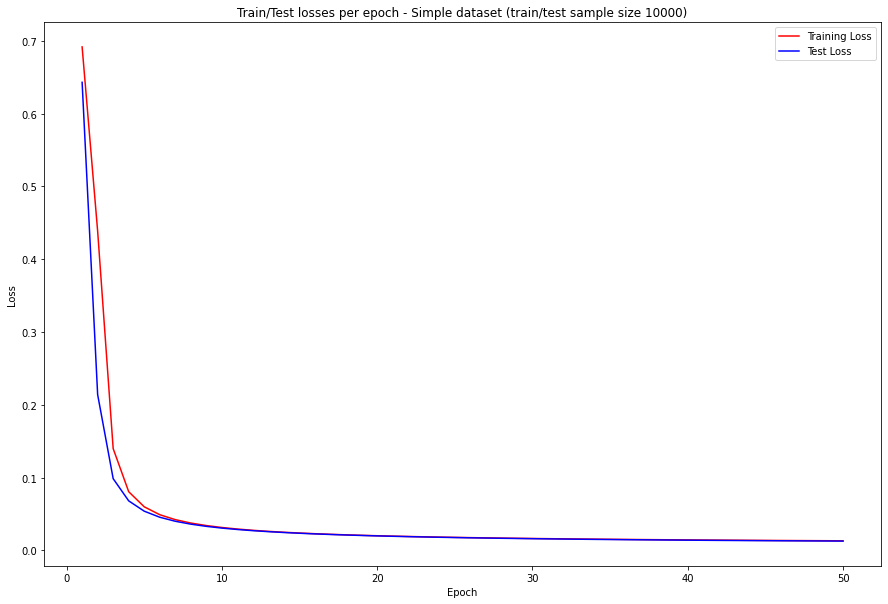

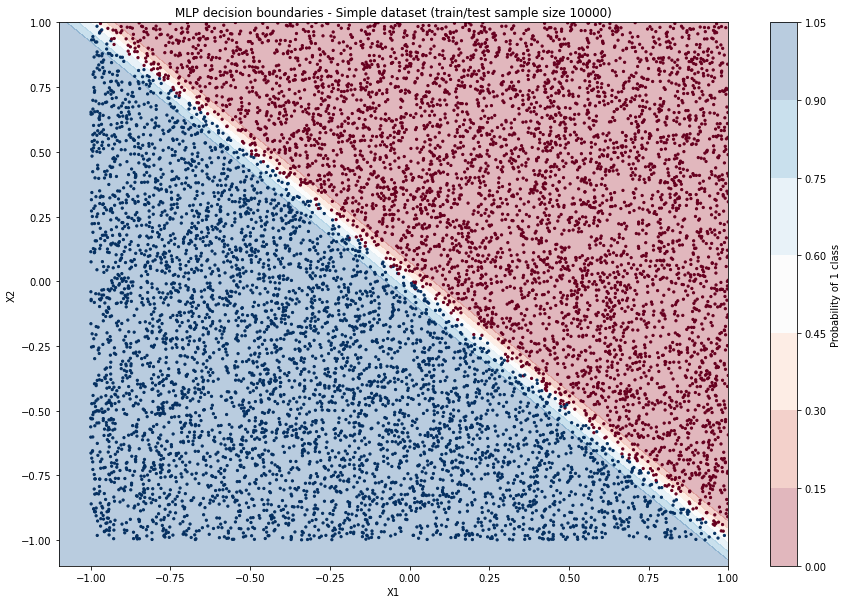

In [2]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{CLF}/data.simple.train.{size}.csv", categorical=True)
    X_test, Y_test = read_data(f"{CLF}/data.simple.test.{size}.csv", categorical=True)
    
    layers = [
        Layer(in_size=2, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=1, activ_function=Sigmoid),
    ]
    print("=======================================================================================")
    header = f"Simple dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=BinaryCrossEntropy,
        bias=True,
        batch_size=16,
        epochs=50,
        momentum=0.001,
        learning_rate=0.5,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}", binary=True)

### Three Gauss dataset

Three Gauss dataset (train/test sample size 10000)
Epoch   10 - train loss 0.074 (std:0.04) - test loss 0.075 (std:0.17)
Epoch   20 - train loss 0.070 (std:0.05) - test loss 0.072 (std:0.21)
Epoch   30 - train loss 0.070 (std:0.06) - test loss 0.072 (std:0.23)
Epoch   40 - train loss 0.070 (std:0.06) - test loss 0.071 (std:0.22)
Epoch   50 - train loss 0.068 (std:0.05) - test loss 0.070 (std:0.21)
Epoch   60 - train loss 0.066 (std:0.05) - test loss 0.067 (std:0.20)
Epoch   70 - train loss 0.063 (std:0.05) - test loss 0.065 (std:0.19)
Epoch   80 - train loss 0.062 (std:0.05) - test loss 0.064 (std:0.18)
Epoch   90 - train loss 0.061 (std:0.04) - test loss 0.063 (std:0.17)
Epoch  100 - train loss 0.060 (std:0.04) - test loss 0.062 (std:0.17)


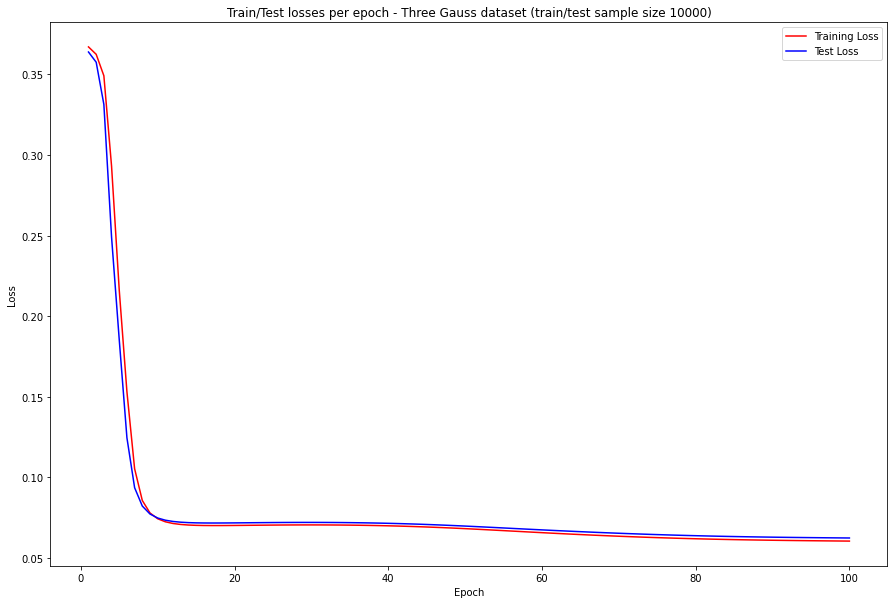

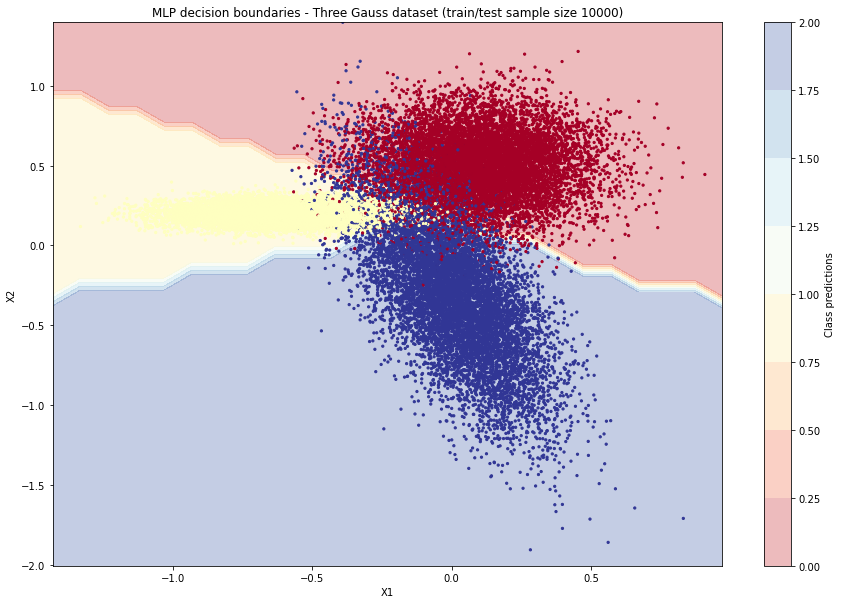

In [3]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{CLF}/data.three_gauss.train.{size}.csv", categorical=True)
    X_test, Y_test = read_data(f"{CLF}/data.three_gauss.test.{size}.csv", categorical=True)
    layers = [
        Layer(in_size=2, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=3, activ_function=SoftMax),
    ]
    print("=======================================================================================")
    header = f"Three Gauss dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=CategoricalCrossEntropy,
        bias=True,
        batch_size=16,
        epochs=100,
        momentum=0.1,
        learning_rate=0.2,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}")

# Regression

### Activation dataset

Activation dataset (train/test sample size 10000)
Epoch   10 - train loss 0.339 (std:0.17) - test loss 3.908 (std:6.65)
Epoch   20 - train loss 0.329 (std:0.39) - test loss 2.869 (std:5.00)
Epoch   30 - train loss 0.325 (std:0.41) - test loss 2.469 (std:4.36)
Epoch   40 - train loss 0.267 (std:0.34) - test loss 2.224 (std:4.02)
Epoch   50 - train loss 0.211 (std:0.28) - test loss 2.031 (std:3.76)
Epoch   60 - train loss 0.170 (std:0.23) - test loss 1.878 (std:3.54)
Epoch   70 - train loss 0.143 (std:0.19) - test loss 1.765 (std:3.35)
Epoch   80 - train loss 0.126 (std:0.16) - test loss 1.675 (std:3.18)
Epoch   90 - train loss 0.112 (std:0.14) - test loss 1.597 (std:3.03)
Epoch  100 - train loss 0.100 (std:0.14) - test loss 1.528 (std:2.91)
Epoch  110 - train loss 0.102 (std:0.14) - test loss 1.468 (std:2.80)
Epoch  120 - train loss 0.100 (std:0.14) - test loss 1.419 (std:2.70)
Epoch  130 - train loss 0.096 (std:0.13) - test loss 1.374 (std:2.62)
Epoch  140 - train loss 0.092 (std:0.12)

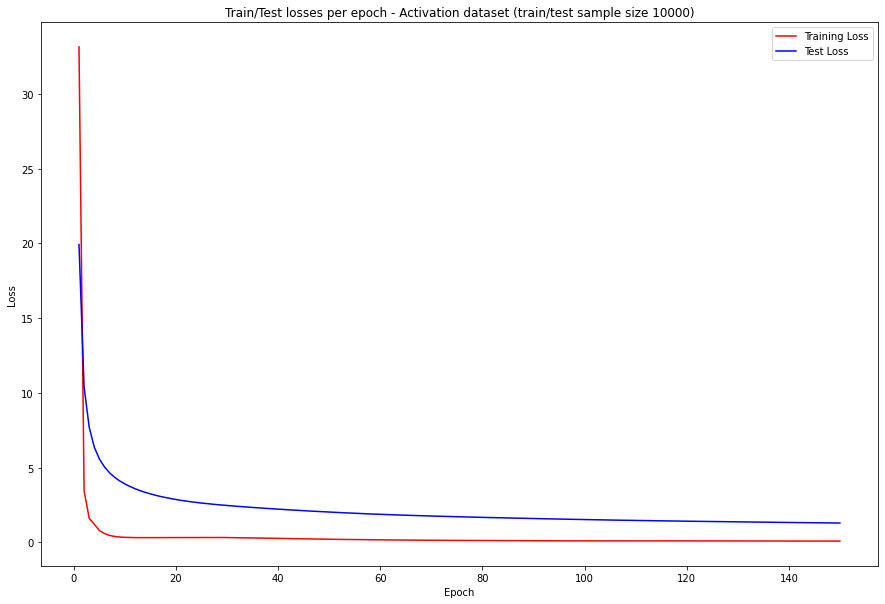

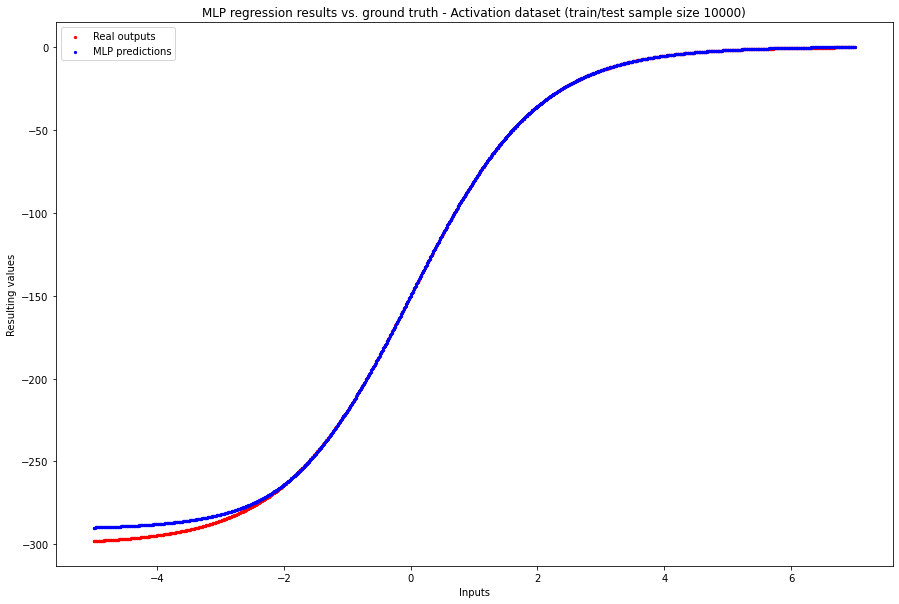

In [4]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{REG}/data.activation.train.{size}.csv")
    X_test, Y_test = read_data(f"{REG}/data.activation.test.{size}.csv")
    layers = [
        Layer(in_size=1, out_size=4, activ_function=Sigmoid),
        Layer(in_size=4, out_size=6, activ_function=Sigmoid),
        Layer(in_size=6, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Activation dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=16,
        epochs=150,
        momentum=0.1,
        learning_rate=0.01,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

### Cube dataset

Cube dataset (train/test sample size 10000)
Epoch   10 - train loss 11.720 (std:4.12) - test loss 162.404 (std:250.73)
Epoch   20 - train loss 11.033 (std:3.83) - test loss 158.059 (std:246.19)
Epoch   30 - train loss 11.276 (std:4.12) - test loss 156.542 (std:244.38)
Epoch   40 - train loss 11.408 (std:4.15) - test loss 156.155 (std:243.79)
Epoch   50 - train loss 11.514 (std:4.21) - test loss 156.164 (std:243.70)
Epoch   60 - train loss 11.553 (std:4.27) - test loss 156.516 (std:244.03)
Epoch   70 - train loss 11.560 (std:4.28) - test loss 156.841 (std:244.33)
Epoch   80 - train loss 11.551 (std:4.27) - test loss 157.018 (std:244.49)
Epoch   90 - train loss 11.324 (std:4.06) - test loss 156.401 (std:243.97)
Epoch  100 - train loss 11.445 (std:4.24) - test loss 156.370 (std:244.01)


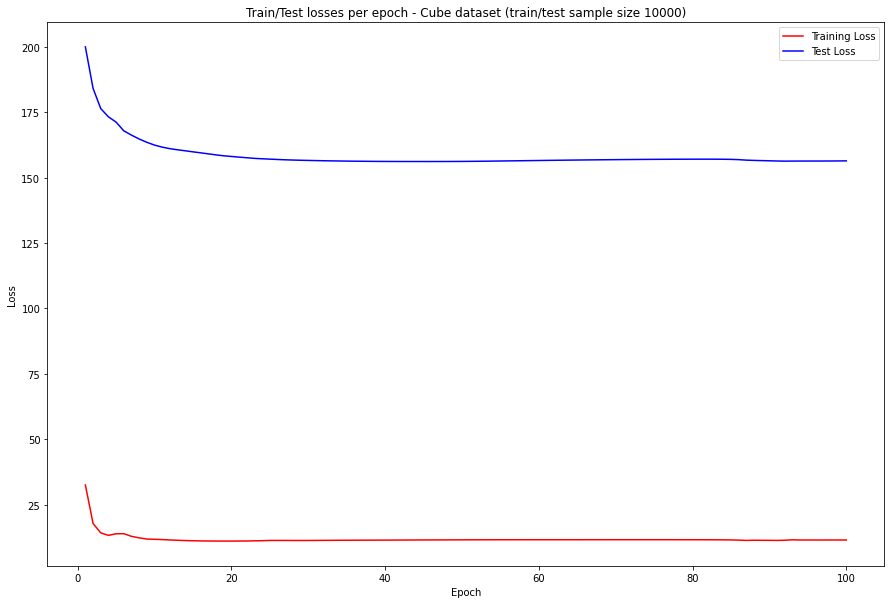

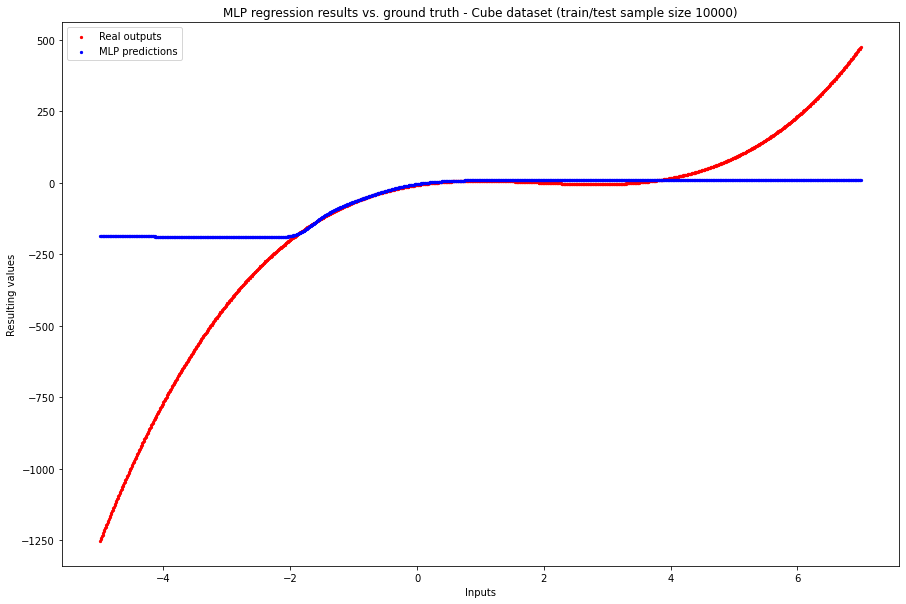

In [5]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{REG}/data.cube.train.{size}.csv")
    X_test, Y_test = read_data(f"{REG}/data.cube.test.{size}.csv")
    layers = [
        Layer(in_size=1, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Cube dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=16,
        epochs=100,
        momentum=0.1,
        learning_rate=0.01,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

### Cube dataset with normalization

Cube dataset (train/test sample size 10000)
Epoch   10 - train loss 0.057 (std:0.05) - test loss 0.064 (std:0.06)
Epoch   20 - train loss 0.047 (std:0.04) - test loss 0.063 (std:0.03)
Epoch   30 - train loss 0.024 (std:0.02) - test loss 0.033 (std:0.02)
Epoch   40 - train loss 0.012 (std:0.01) - test loss 0.027 (std:0.01)
Epoch   50 - train loss 0.011 (std:0.01) - test loss 0.027 (std:0.01)
Epoch   60 - train loss 0.010 (std:0.01) - test loss 0.028 (std:0.01)
Epoch   70 - train loss 0.009 (std:0.01) - test loss 0.028 (std:0.01)
Epoch   80 - train loss 0.009 (std:0.01) - test loss 0.028 (std:0.01)
Epoch   90 - train loss 0.008 (std:0.01) - test loss 0.027 (std:0.01)
Epoch  100 - train loss 0.007 (std:0.01) - test loss 0.027 (std:0.01)


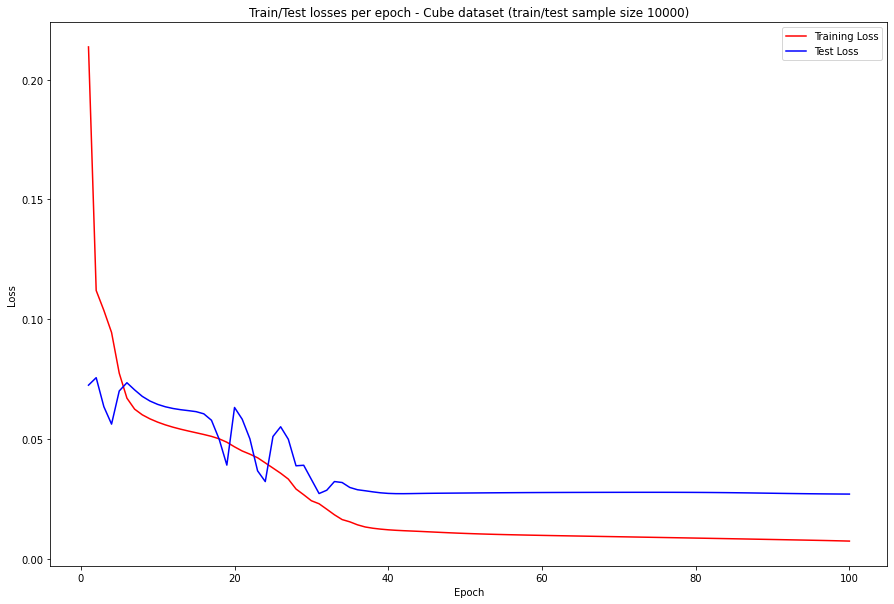

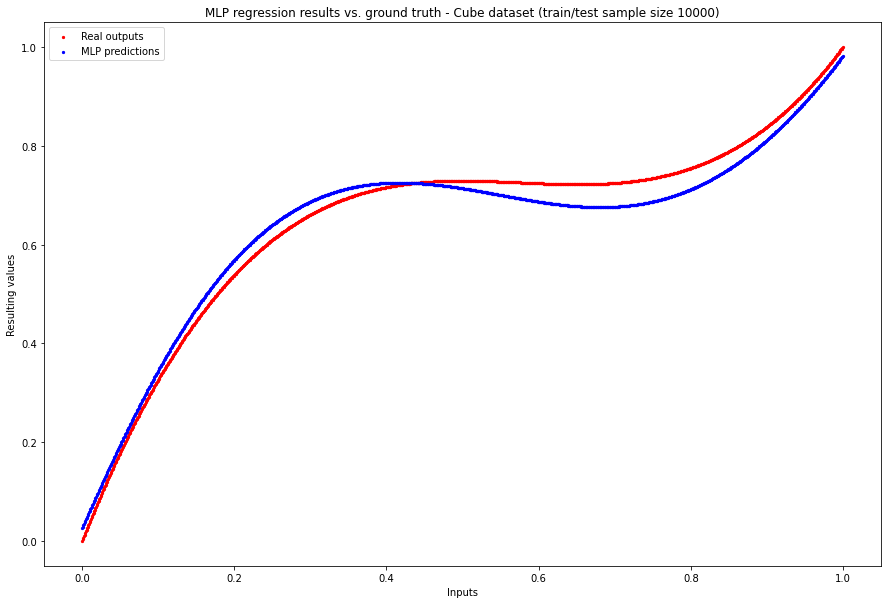

In [6]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{REG}/data.cube.train.{size}.csv", normalize_inputs=True)
    X_test, Y_test = read_data(f"{REG}/data.cube.test.{size}.csv", normalize_inputs=True)
    layers = [
        Layer(in_size=1, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Cube dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=1,
        epochs=100,
        momentum=0.99,
        learning_rate=0.01,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

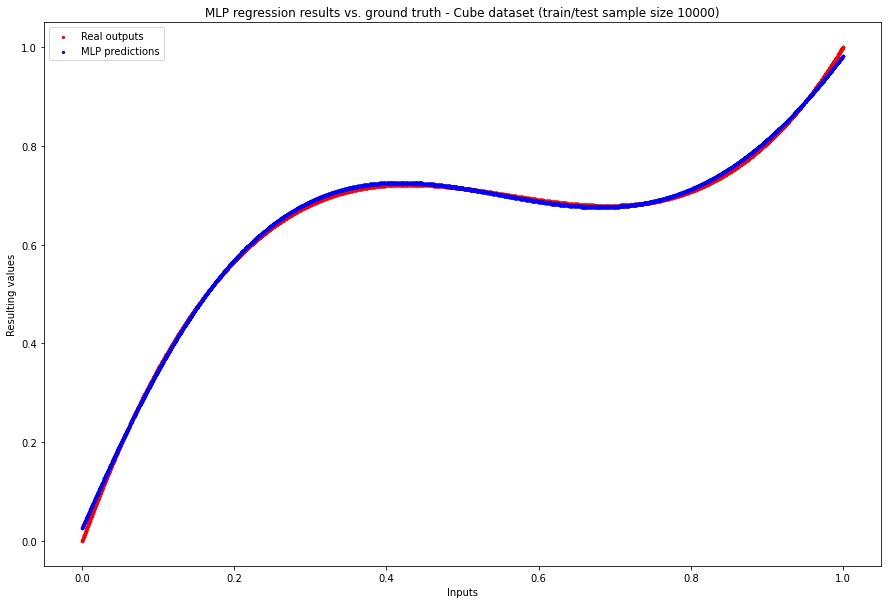

In [7]:
plot_regression_decisions(X, Y, m, f"MLP regression results vs. ground truth - {header}")

# Experiments